In [1]:
import subprocess
import sys
from datetime import datetime
from pathlib import Path
from urllib.parse import urlparse

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import rasterio

In [3]:
# df1 = pd.read_csv('cacao_mono.csv').filter(items=['x', 'y'])
# df1['Land Cover'] = 'cacao-mono'
# df2 = pd.read_csv('cacao_agro.csv').filter(items=['x', 'y'])
# df2['Land Cover'] = 'cacao-agro'
# df = pd.concat([df1, df2])
df_list = []
for lc in ['cacao_mono_closed', 'cacao_mono_opened', 'cacao_agro_closed', 'cacao_agro_opened', 'Purma']:
    df = pd.read_csv(f'{lc}.csv').filter(items=['x', 'y'])
    df['Land Cover'] = lc
    df_list.append(df)
df = pd.concat(df_list)
df

,x,y,Land Cover
0,497805.0,9031875.0,cacao_mono_closed
1,497835.0,9031875.0,cacao_mono_closed
2,497805.0,9031845.0,cacao_mono_closed
3,497835.0,9031845.0,cacao_mono_closed
4,497865.0,9031845.0,cacao_mono_closed
...,...,...,...
728,456405.0,9000105.0,Purma
729,456435.0,9000105.0,Purma
730,456465.0,9000105.0,Purma
731,456375.0,9000075.0,Purma


In [4]:
ls_cmd = 'gsutil ls s3://servir-public/geotiffs/peru/sentinel_1/2020/171_622/*.zip'
url_list = subprocess.check_output(ls_cmd, shell=True).decode(sys.stdout.encoding).splitlines()
for url in url_list:
    u = urlparse(url)
    bucket = u.netloc
    prefix = u.path
    product = Path(prefix).stem
    date = product[7:15]
    print(date)
    for pol in ['VV', 'VH']:
        print(pol)
        vsipath = f'/vsizip/vsis3/{bucket}{prefix}/{product}/{product}_{pol}.tif'
        with rasterio.open(vsipath) as dset:
            rows, cols = dset.index(df.x, df.y)
            df[f'{date}_{pol}'] = dset.read(1)[rows, cols]
    

20200101
VV
VH
20200113
VV
VH
20200125
VV
VH
20200206
VV
VH
20200218
VV
VH
20200301
VV
VH
20200313
VV
VH
20200325
VV
VH
20200406
VV
VH
20200418
VV
VH
20200430
VV
VH
20200512
VV
VH
20200524
VV
VH
20200605
VV
VH
20200617
VV
VH
20200629
VV
VH
20200711
VV
VH
20200723
VV
VH
20200804
VV
VH
20200816
VV
VH
20200828
VV
VH
20200909
VV
VH
20200921
VV
VH
20201003
VV
VH
20201015
VV
VH
20201027
VV
VH
20201108
VV
VH
20201120
VV
VH
20201202
VV
VH
20201226
VV
VH


In [6]:
df.to_csv('S1_171_622_2020_cacao.csv', index=False)

In [15]:
df = df[df['20200101_VV'] != 0]
df

,x,y,Land Cover,20200101_VV,20200101_VH,20200113_VV,20200113_VH,20200125_VV,20200125_VH,20200206_VV,...,20201027_VV,20201027_VH,20201108_VV,20201108_VH,20201120_VV,20201120_VH,20201202_VV,20201202_VH,20201226_VV,20201226_VH
0,497805.0,9031875.0,cacao_mono_closed,0.181318,0.032869,0.215382,0.031138,0.143595,0.039627,0.166769,...,0.163024,0.029283,0.213379,0.037643,0.166295,0.031407,0.269756,0.065434,0.207584,0.036980
1,497835.0,9031875.0,cacao_mono_closed,0.144373,0.027208,0.193555,0.030187,0.146690,0.043453,0.153189,...,0.155116,0.033283,0.177454,0.037956,0.203690,0.036527,0.224141,0.066121,0.206907,0.032931
2,497805.0,9031845.0,cacao_mono_closed,0.166274,0.030942,0.233902,0.029906,0.147887,0.036945,0.178465,...,0.173568,0.031966,0.194614,0.032709,0.149035,0.027636,0.240716,0.057738,0.167265,0.043801
3,497835.0,9031845.0,cacao_mono_closed,0.135015,0.022391,0.203053,0.025305,0.149804,0.040038,0.151377,...,0.141210,0.029918,0.147932,0.031413,0.154994,0.036486,0.200470,0.049382,0.191925,0.036552
4,497865.0,9031845.0,cacao_mono_closed,0.119668,0.023271,0.181547,0.025028,0.151114,0.041392,0.148067,...,0.136533,0.032657,0.120517,0.028356,0.156876,0.036436,0.207139,0.046633,0.235996,0.035625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
728,456405.0,9000105.0,Purma,0.275202,0.070279,0.369280,0.064751,0.263295,0.056465,0.327929,...,0.338597,0.064207,0.445973,0.062036,0.260086,0.052559,0.249908,0.050442,0.217716,0.063293
729,456435.0,9000105.0,Purma,0.204584,0.047420,0.296887,0.033585,0.200265,0.032641,0.227844,...,0.239080,0.042322,0.381641,0.047485,0.171344,0.032217,0.201798,0.041484,0.183864,0.045800
730,456465.0,9000105.0,Purma,0.155330,0.029865,0.218519,0.023578,0.165614,0.031086,0.139001,...,0.168065,0.033016,0.174370,0.034546,0.180320,0.026534,0.147106,0.030547,0.159870,0.035016
731,456375.0,9000075.0,Purma,0.354016,0.098231,0.306178,0.059869,0.337418,0.082238,0.250434,...,0.318177,0.079861,0.370391,0.049311,0.325951,0.072267,0.301674,0.050562,0.211335,0.081689


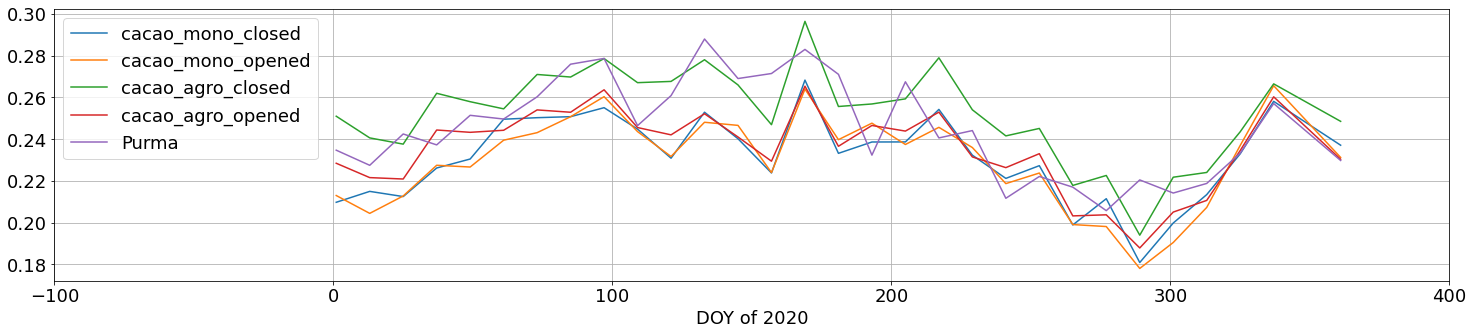

In [36]:
for lc in ['cacao_mono_closed', 'cacao_mono_opened', 'cacao_agro_closed', 'cacao_agro_opened', 'Purma']:
    df_vv = df[df['Land Cover'] == lc].filter(like='VV', axis=1)
    doy = [datetime.strptime(date, '%Y%m%d').timetuple().tm_yday for date in df_vv.columns.str[0:8].to_list()]
    plt.plot(doy, np.median(df_vv.values, axis=0), label=lc)
plt.xlim([-100, 400])
plt.xlabel('DOY of 2020')
plt.grid()
plt.legend()
plt.savefig('S1VV_171_622_2020_cacao_vs_purma.png')

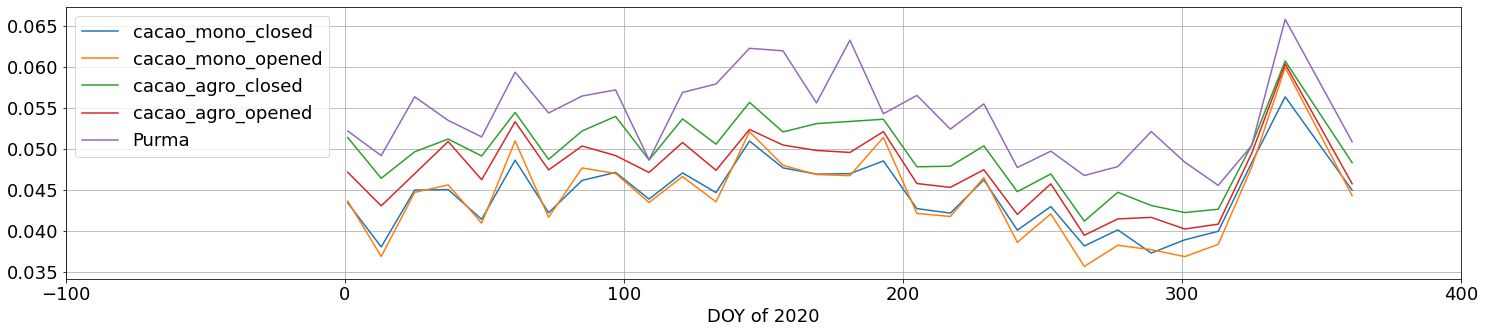

In [37]:
for lc in ['cacao_mono_closed', 'cacao_mono_opened', 'cacao_agro_closed', 'cacao_agro_opened', 'Purma']:
    df_vv = df[df['Land Cover'] == lc].filter(like='VH', axis=1)
    doy = [datetime.strptime(date, '%Y%m%d').timetuple().tm_yday for date in df_vv.columns.str[0:8].to_list()]
    plt.plot(doy, np.median(df_vv.values, axis=0), label=lc)
plt.xlim([-100, 400])
plt.xlabel('DOY of 2020')
plt.grid()
plt.legend()
plt.savefig('S1VH_171_622_2020_cacao_vs_purma.png')

Text(0.5, 0, 'DOY of 2020')

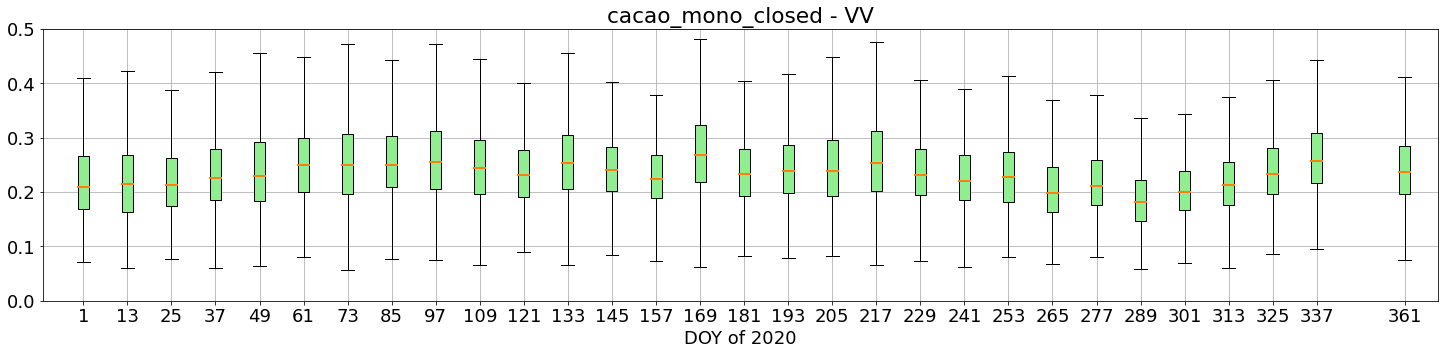

In [18]:
lc = 'cacao_mono_closed'
df1 = df[df['Land Cover'] == lc]
plt.rcParams['font.size'] = 18
plt.rcParams['figure.figsize'] = [25, 5]
plt.rcParams['axes.axisbelow'] = True
df_vv = df1.filter(like='VV', axis=1)
doy = [datetime.strptime(date, '%Y%m%d').timetuple().tm_yday for date in df_vv.columns.str[0:8].to_list()]
bp = plt.boxplot(df_vv.values, positions=doy, widths=3, labels=None, patch_artist=True, showfliers=False)
for cap in bp['caps']:
    cap.set_xdata(cap.get_xdata() + (-1, +1))
    # cap.set_linewidth(2)
# for whisker in bp['whiskers']:
#     whisker.set_linewidth(2)
for box in bp['boxes']:
    box.set_facecolor('lightgreen')
    # box.set_linewidth(2)
for median in bp['medians']:
    # median.set_color('black')
        median.set_linewidth(2)
plt.xlim([-10, 370])
plt.ylim([0, 0.5])
plt.grid()
plt.title(f'{lc} - VV')
plt.xlabel('DOY of 2020')

Text(0.5, 0, 'DOY of 2020')

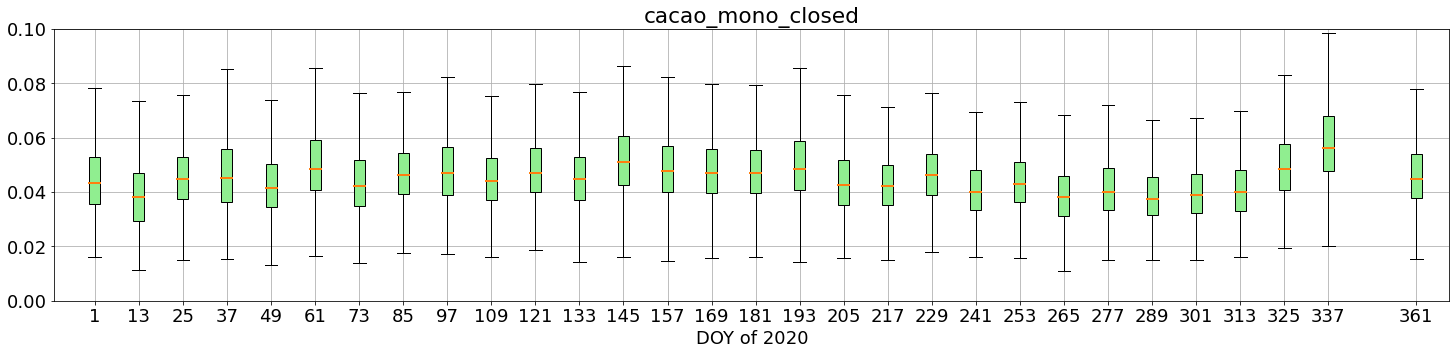

In [20]:
df_vh = df1.filter(like='VH', axis=1)
doy = [datetime.strptime(date, '%Y%m%d').timetuple().tm_yday for date in df_vh.columns.str[0:8].to_list()]
bp = plt.boxplot(df_vh.values, positions=doy, widths=3, labels=None, patch_artist=True, showfliers=False)
for cap in bp['caps']:
    cap.set_xdata(cap.get_xdata() + (-1, +1))
    # cap.set_linewidth(2)
# for whisker in bp['whiskers']:
#     whisker.set_linewidth(2)
for box in bp['boxes']:
    box.set_facecolor('lightgreen')
    # box.set_linewidth(2)
for median in bp['medians']:
    # median.set_color('black')
        median.set_linewidth(2)
plt.xlim([-10, 370])
plt.ylim([0, 0.1])
plt.grid()
plt.title(f'{lc}')
plt.xlabel('DOY of 2020')

Text(0.5, 0, 'DOY of 2020')

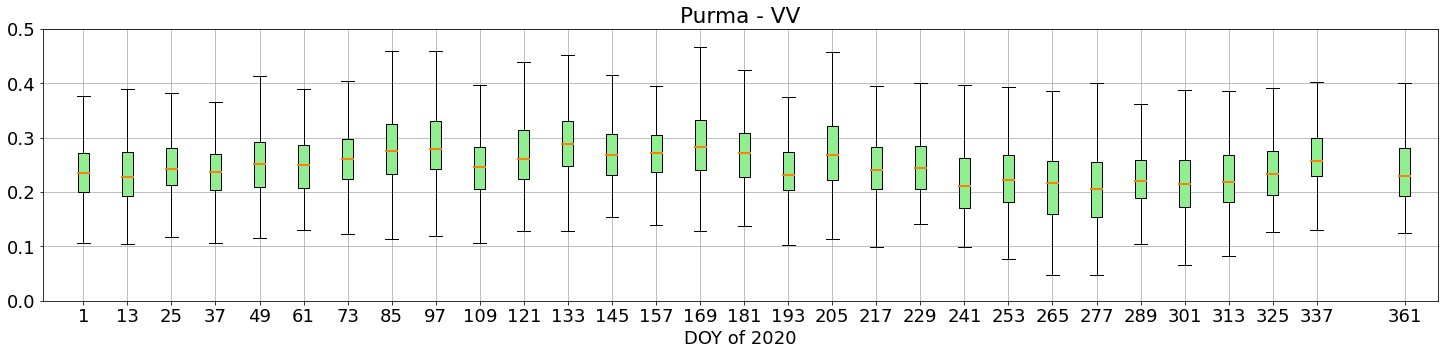

In [21]:
lc = 'Purma'
df1 = df[df['Land Cover'] == lc]
plt.rcParams['font.size'] = 18
plt.rcParams['figure.figsize'] = [25, 5]
plt.rcParams['axes.axisbelow'] = True
df_vv = df1.filter(like='VV', axis=1)
doy = [datetime.strptime(date, '%Y%m%d').timetuple().tm_yday for date in df_vv.columns.str[0:8].to_list()]
bp = plt.boxplot(df_vv.values, positions=doy, widths=3, labels=None, patch_artist=True, showfliers=False)
for cap in bp['caps']:
    cap.set_xdata(cap.get_xdata() + (-1, +1))
    # cap.set_linewidth(2)
# for whisker in bp['whiskers']:
#     whisker.set_linewidth(2)
for box in bp['boxes']:
    box.set_facecolor('lightgreen')
    # box.set_linewidth(2)
for median in bp['medians']:
    # median.set_color('black')
        median.set_linewidth(2)
plt.xlim([-10, 370])
plt.ylim([0, 0.5])
plt.grid()
plt.title(f'{lc} - VV')
plt.xlabel('DOY of 2020')

Text(0.5, 0, 'DOY of 2020')

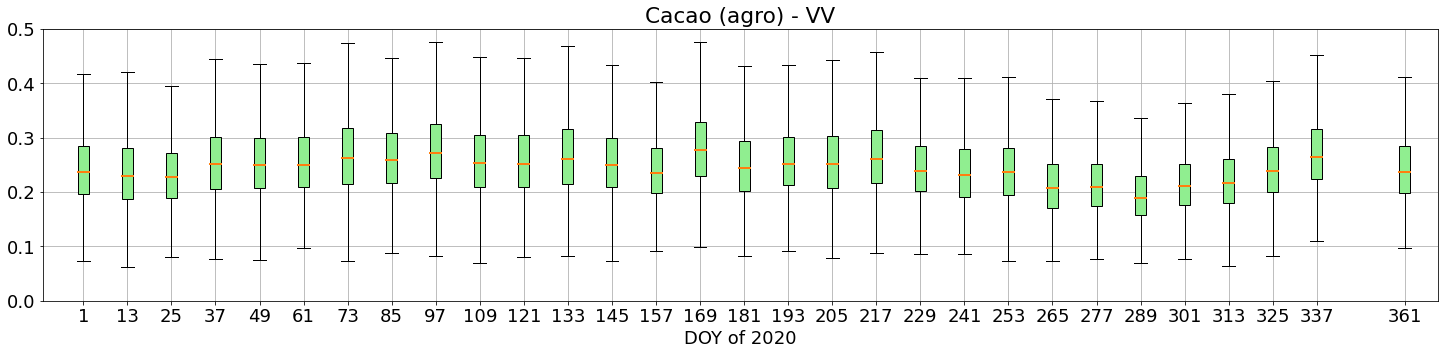

In [62]:
plt.rcParams['font.size'] = 18
plt.rcParams['figure.figsize'] = [25, 5]
plt.rcParams['axes.axisbelow'] = True
df_vv = df2.filter(like='VV', axis=1)
doy = [datetime.strptime(date, '%Y%m%d').timetuple().tm_yday for date in df_vv.columns.str[0:8].to_list()]
bp = plt.boxplot(df_vv.values, positions=doy, widths=3, labels=None, patch_artist=True, showfliers=False)
for cap in bp['caps']:
    cap.set_xdata(cap.get_xdata() + (-1, +1))
    # cap.set_linewidth(2)
# for whisker in bp['whiskers']:
#     whisker.set_linewidth(2)
for box in bp['boxes']:
    box.set_facecolor('lightgreen')
    # box.set_linewidth(2)
for median in bp['medians']:
    # median.set_color('black')
        median.set_linewidth(2)
plt.xlim([-10, 370])
plt.ylim([0, 0.5])
plt.grid()
plt.title('Cacao (agro) - VV')
plt.xlabel('DOY of 2020')

Text(0.5, 0, 'DOY of 2020')

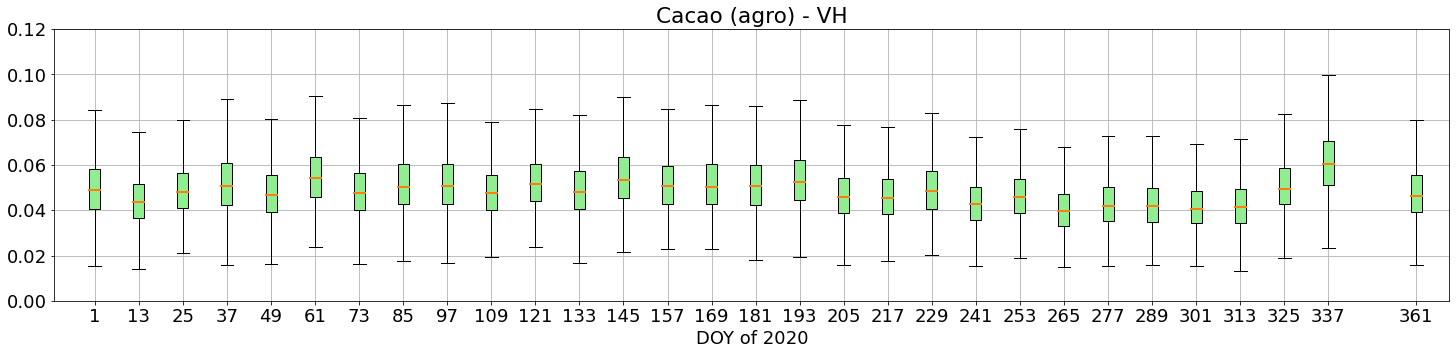

In [63]:
plt.rcParams['font.size'] = 18
plt.rcParams['figure.figsize'] = [25, 5]
plt.rcParams['axes.axisbelow'] = True
df_vh = df2.filter(like='VH', axis=1)
doy = [datetime.strptime(date, '%Y%m%d').timetuple().tm_yday for date in df_vh.columns.str[0:8].to_list()]
bp = plt.boxplot(df_vh.values, positions=doy, widths=3, labels=None, patch_artist=True, showfliers=False)
for cap in bp['caps']:
    cap.set_xdata(cap.get_xdata() + (-1, +1))
    # cap.set_linewidth(2)
# for whisker in bp['whiskers']:
#     whisker.set_linewidth(2)
for box in bp['boxes']:
    box.set_facecolor('lightgreen')
    # box.set_linewidth(2)
for median in bp['medians']:
    # median.set_color('black')
        median.set_linewidth(2)
plt.xlim([-10, 370])
plt.ylim([0, 0.12])
plt.grid()
plt.title('Cacao (agro) - VH')
plt.xlabel('DOY of 2020')